# Visualizing your data


## Which avocado size is most popular?


In [8]:
import pandas as pd
avocados = pd.read_csv("datasets/avocados.csv", parse_dates=["date"])
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


In [9]:
avocados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 6 columns):
date         1014 non-null datetime64[ns]
type         1014 non-null object
year         1014 non-null int64
avg_price    1014 non-null float64
size         1014 non-null object
nb_sold      1014 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 47.6+ KB


        date          type  year  avg_price   size     nb_sold
0 2015-12-27  conventional  2015       0.95  small  9626901.09
1 2015-12-20  conventional  2015       0.98  small  8710021.76
2 2015-12-13  conventional  2015       0.93  small  9855053.66
3 2015-12-06  conventional  2015       0.89  small  9405464.36
4 2015-11-29  conventional  2015       0.99  small  8094803.56


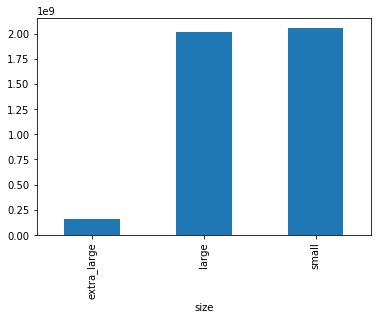

In [12]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size")['nb_sold'].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")

# Show the plot
plt.show()

## Changes in sales over time


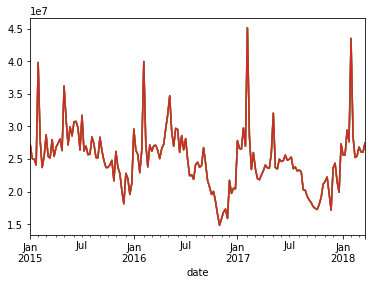

In [18]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind="line", x="date", y="nb_sold")

# Show the plot
plt.show()

## Avocado supply and demand


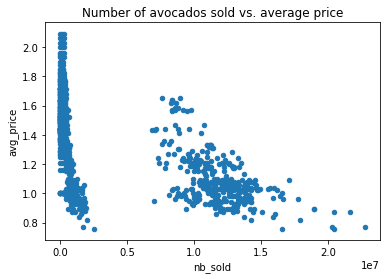

In [21]:
# Scatter plot of nb_sold vs avg_price with title
avocados.plot(kind="scatter", x="nb_sold", y="avg_price", title="Number of avocados sold vs. average price")

# Show the plot
plt.show()

## Price of conventional vs. organic avocados

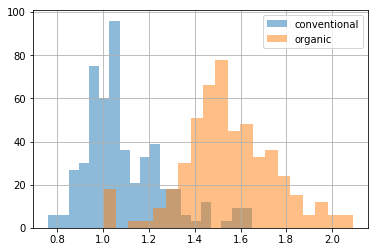

In [26]:
# Histogram of conventional avg_price 
avocados[avocados["type"]=="conventional"]["avg_price"].hist(alpha=0.5, bins=20)

# Histogram of organic avg_price
avocados[avocados["type"]=="organic"]["avg_price"].hist(alpha=0.5, bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

# Missing values


## Finding missing values


In [52]:
#create avocados2016 (subset only consisting of 2016 data)

#avocados2016 = avocados[(avocados['date']>='2016-01-01') & (avocados['date']<='2016-12-13')]

avocados_2016 = pd.read_csv("datasets/avocados_2016.csv")

avocados_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
date               52 non-null object
avg_price          52 non-null float64
total_sold         52 non-null float64
small_sold         46 non-null float64
large_sold         46 non-null float64
xl_sold            48 non-null float64
total_bags_sold    52 non-null float64
small_bags_sold    52 non-null float64
large_bags_sold    52 non-null float64
xl_bags_sold       52 non-null float64
dtypes: float64(9), object(1)
memory usage: 4.1+ KB


     date  avg_price  total_sold  small_sold  large_sold  xl_sold  \
0   False      False       False       False       False    False   
1   False      False       False       False       False    False   
2   False      False       False       False        True    False   
3   False      False       False       False       False    False   
4   False      False       False       False       False     True   
5   False      False       False        True       False    False   
6   False      False       False       False       False    False   
7   False      False       False       False        True    False   
8   False      False       False       False       False    False   
9   False      False       False       False       False    False   
10  False      False       False       False        True    False   
11  False      False       False       False       False    False   
12  False      False       False       False       False    False   
13  False      False       False  

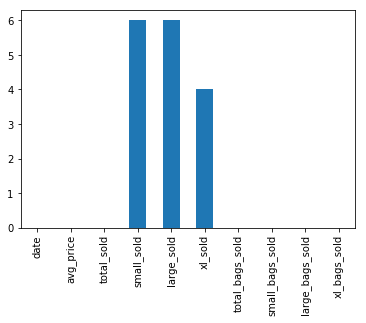

In [55]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Check individual values for missing values
print(avocados_2016.isnull())

# Check each column for missing values
print(avocados_2016.isnull().any())

# Bar plot of missing values by variable
avocados_2016.isnull().sum().plot(kind='bar')

# Show plot
plt.show()

## Removing missing values


In [56]:
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isnull().any())

date               False
avg_price          False
total_sold         False
small_sold         False
large_sold         False
xl_sold            False
total_bags_sold    False
small_bags_sold    False
large_bags_sold    False
xl_bags_sold       False
dtype: bool


## Replacing missing values


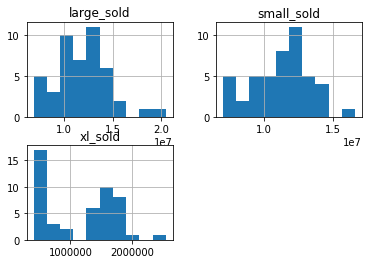

In [57]:
# List the columns with missing values
cols_with_missing = ["small_sold","large_sold","xl_sold"]

# Create histograms showing the distributions cols_with_missing
avocados_2016[cols_with_missing].hist()

# Show the plot
plt.show()

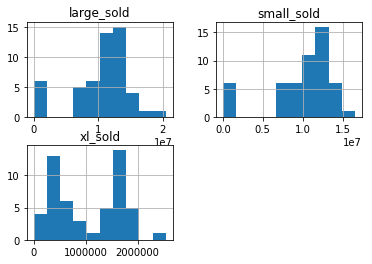

In [58]:
# Fill in missing values with 0
avocados_filled = avocados_2016.fillna(0)

# Create histograms of the filled columns
avocados_filled[cols_with_missing].hist()

# Show the plot
plt.show()

## Creating DataFrames


## List of dictionaries


In [61]:
# Create a list of dictionaries with new data
avocados_list = [
    {'date': "2019-11-03", 'small_sold': 10376832, 'large_sold': 7835071},
    {'date': "2019-11-10", 'small_sold': 10717154, 'large_sold': 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  large_sold  small_sold
0  2019-11-03     7835071    10376832
1  2019-11-10     8561348    10717154


## Dictionary of lists


In [65]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17", "2019-12-01"],
  "small_sold": [10859987, 9291631 ],
  "large_sold": [7674135, 6238096 ]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  large_sold  small_sold
0  2019-11-17     7674135    10859987
1  2019-12-01     6238096     9291631


# Reading and writing CSVs


## CSV to DataFrame


In [66]:
# Read CSV as DataFrame called airline_bumping
airline_bumping = pd.read_csv("datasets/airline_bumping.csv")

# Take a look at the DataFrame
print(airline_bumping.head())

             airline  year  nb_bumped  total_passengers
0    DELTA AIR LINES  2017        679          99796155
1     VIRGIN AMERICA  2017        165           6090029
2    JETBLUE AIRWAYS  2017       1475          27255038
3    UNITED AIRLINES  2017       2067          70030765
4  HAWAIIAN AIRLINES  2017         92           8422734


In [67]:
# For each airline, select nb_bumped and total_passengers and sum
airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()

In [70]:
# Create new col, bumps_per_10k: no. of bumps per 10k passengers for each airline
airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000

In [71]:
# Print airline_totals
print(airline_totals)

                     nb_bumped  total_passengers  bumps_per_10k
airline                                                        
ALASKA AIRLINES           1392          36543121       0.380920
AMERICAN AIRLINES        11115         197365225       0.563169
DELTA AIR LINES           1591         197033215       0.080748
EXPRESSJET AIRLINES       3326          27858678       1.193883
FRONTIER AIRLINES         1228          22954995       0.534960
HAWAIIAN AIRLINES          122          16577572       0.073593
JETBLUE AIRWAYS           3615          53245866       0.678926
SKYWEST AIRLINES          3094          47091737       0.657015
SOUTHWEST AIRLINES       18585         228142036       0.814624
SPIRIT AIRLINES           2920          32304571       0.903897
UNITED AIRLINES           4941         134468897       0.367446
VIRGIN AMERICA             242          12017967       0.201365


## DataFrame to CSV


In [76]:
# Create airline_totals_sorted
airline_totals_sorted = airline_totals.sort_values("bumps_per_10k", ascending=False)

# Print airline_totals_sorted
print(airline_totals_sorted)

# Save as airline_totals_sorted.csv
airline_totals_sorted.to_csv("datasets/airline_totals_sorted.csv")

                     nb_bumped  total_passengers  bumps_per_10k
airline                                                        
EXPRESSJET AIRLINES       3326          27858678       1.193883
SPIRIT AIRLINES           2920          32304571       0.903897
SOUTHWEST AIRLINES       18585         228142036       0.814624
JETBLUE AIRWAYS           3615          53245866       0.678926
SKYWEST AIRLINES          3094          47091737       0.657015
AMERICAN AIRLINES        11115         197365225       0.563169
FRONTIER AIRLINES         1228          22954995       0.534960
ALASKA AIRLINES           1392          36543121       0.380920
UNITED AIRLINES           4941         134468897       0.367446
VIRGIN AMERICA             242          12017967       0.201365
DELTA AIR LINES           1591         197033215       0.080748
HAWAIIAN AIRLINES          122          16577572       0.073593
